# **Module 4 - Regression EDA**
# **Fangayou Yaya Ouattara**

# **Introduction & Purpose of Analysis**
This analysis explores how various demographic and health-related factors impact medical insurance charges. Using exploratory data analysis (EDA) and regression modeling, we aim to identify key predictors of insurance costs. The dataset contains 1338 records and 7 features, including age, BMI, number of children, smoking status, and region. Our goal is to determine which factors contribute most to higher insurance costs, how smoking affects medical expenses, whether there is a correlation between BMI and insurance charges, and whether we can build a model that accurately predicts insurance costs. By performing EDA and training a linear regression model, we hope to uncover insights that could help insurance providers, policyholders, and healthcare analysts better understand cost determinants.

# **Regression EDA & Model Evaluation**

The script imports essential libraries for data analysis, visualization, and regression modeling. It then loads the dataset into a DataFrame using pd.read_csv(). Finally, df.info() and df.head() provide an overview of dataset structure, ensuring it is ready for further analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/fangayou90/Regression-EDA/refs/heads/main/insurance.csv")

# Display dataset info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Exploratory Data Analysis (EDA)**

The analysis explores data distributions, relationships, and outliers. Pair plots reveal trends, while heatmaps highlight correlations. Histograms and box plots detect skewness and anomalies. Bar and violin plots show categorical impacts, ensuring informed feature selection for accurate regression modeling of medical insurance charges.

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


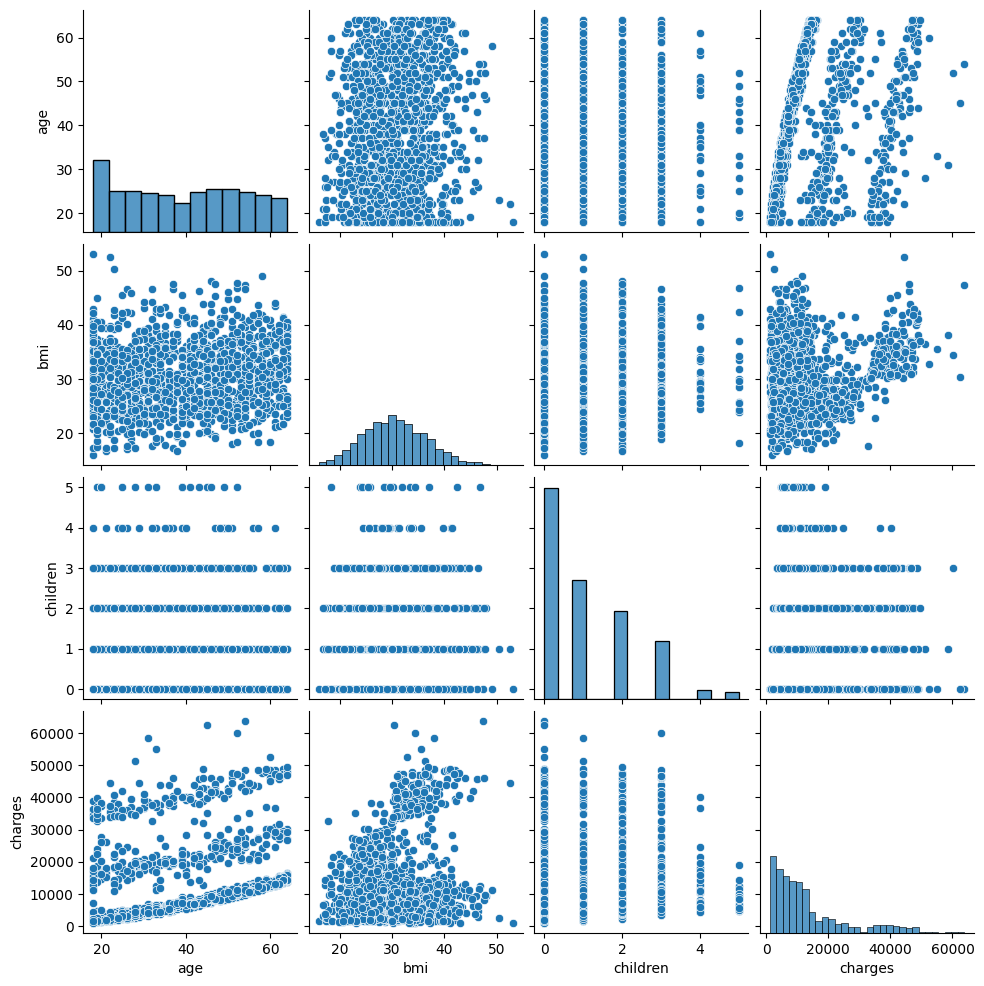

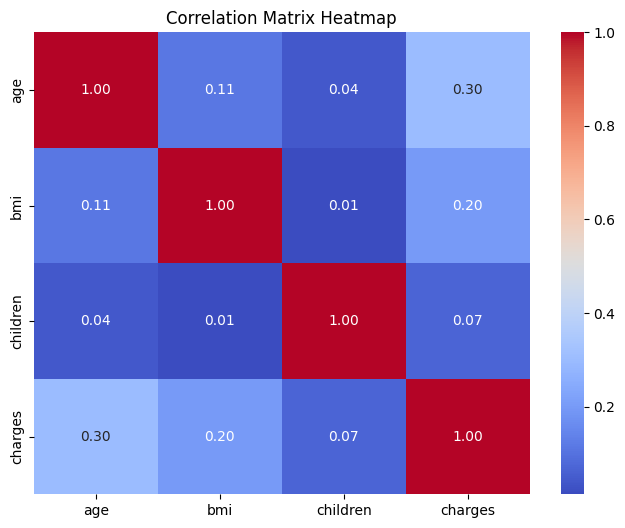

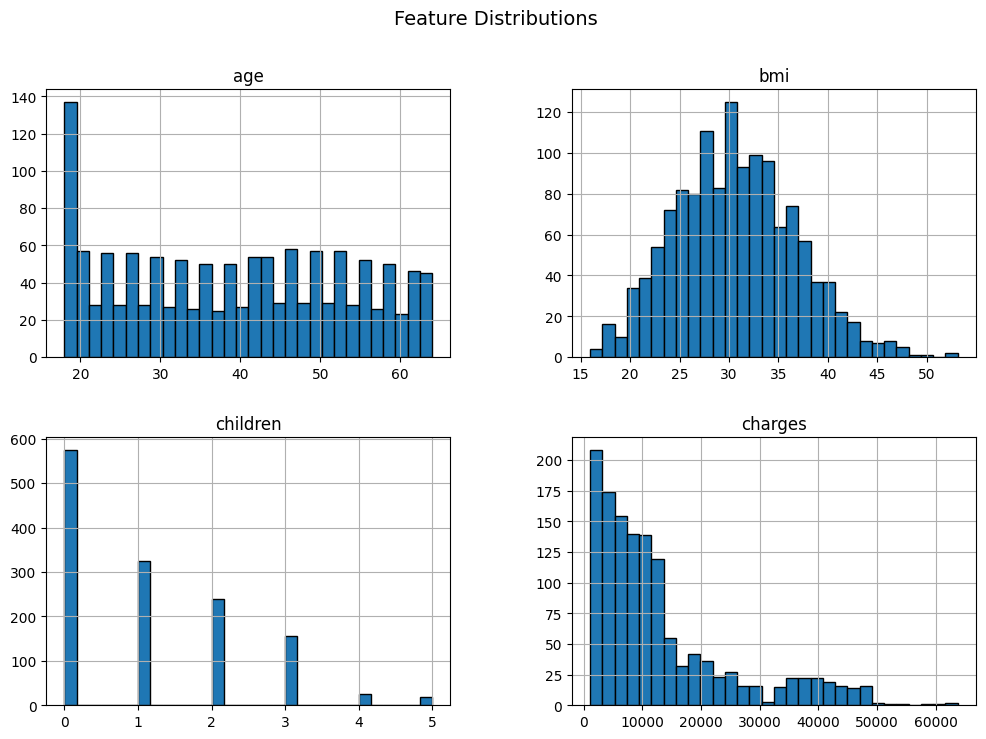

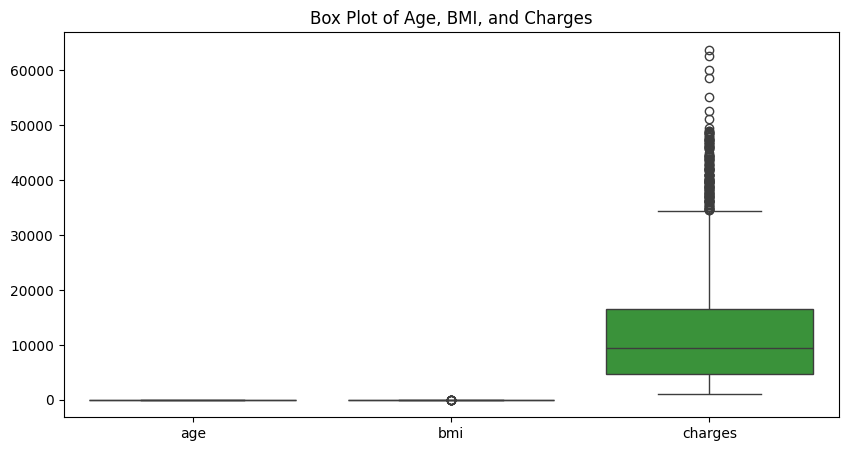

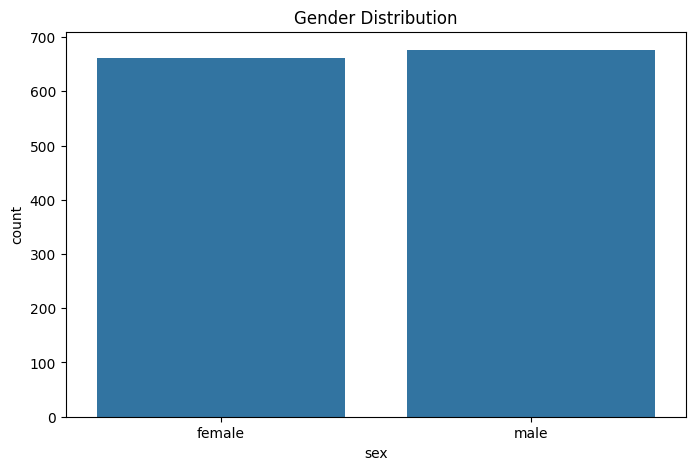

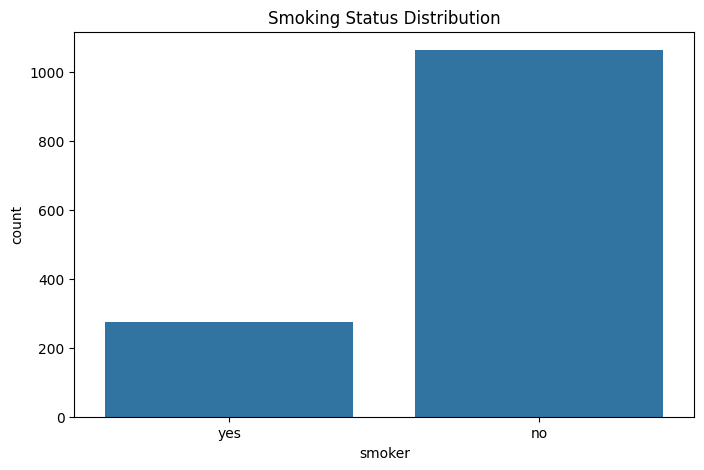

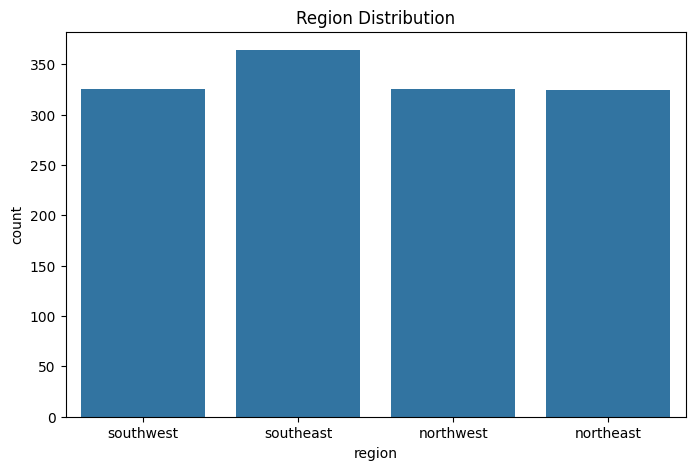

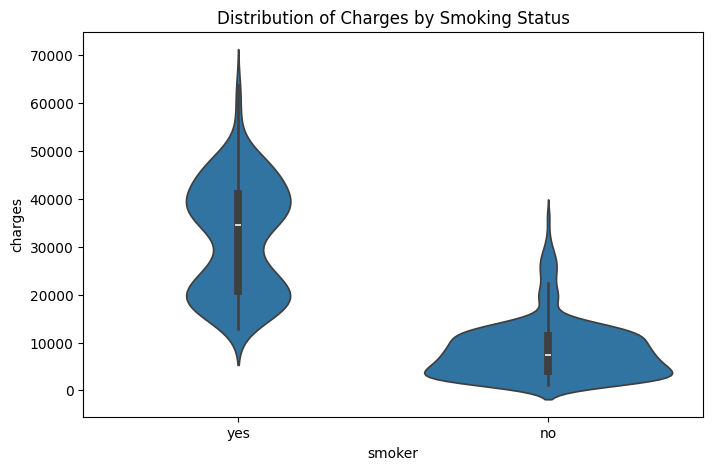

In [2]:
# Display basic statistics
print(df.describe())

# Pair plot for numerical features
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Histograms
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Box Plot of Age, BMI, and Charges")
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="smoker", data=df)
plt.title("Smoking Status Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="region", data=df)
plt.title("Region Distribution")
plt.show()

# Violin plot for charges based on smoker status
plt.figure(figsize=(8, 5))
sns.violinplot(x="smoker", y="charges", data=df)
plt.title("Distribution of Charges by Smoking Status")
plt.show()


# **Regression Model**

The model first encodes categorical variables using pd.get_dummies(), converting them into numerical format. Then, the dataset is split into training and testing sets. A Linear Regression model is trained to predict insurance charges. Evaluation metrics like RMSE, MSE, R², MAE, and MAPE assess model accuracy, ensuring reliable predictions.

In [3]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Splitting dataset
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Regression Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display Metrics
metrics = pd.DataFrame({
    "Metric": ["RMSE", "MSE", "R²", "MAE", "MAPE"],
    "Value": [rmse, mse, r2, mae, mape]
})
print(metrics)


  Metric         Value
0   RMSE  5.796285e+03
1    MSE  3.359692e+07
2     R²  7.835930e-01
3    MAE  4.181194e+03
4   MAPE  4.688826e-01


# **Dataset ShapE, Size, Checcking for Missing data, and CDF**
The following are used to Understanding the dataset dimensions, ensuring data completeness, and analyzing the cumulative distribution of charges (CDF)

In [4]:
df.shape  # Displays number of rows and columns in the dataset

(1338, 7)

In [5]:
df.isnull().sum()  # Summarizes missing values per column

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


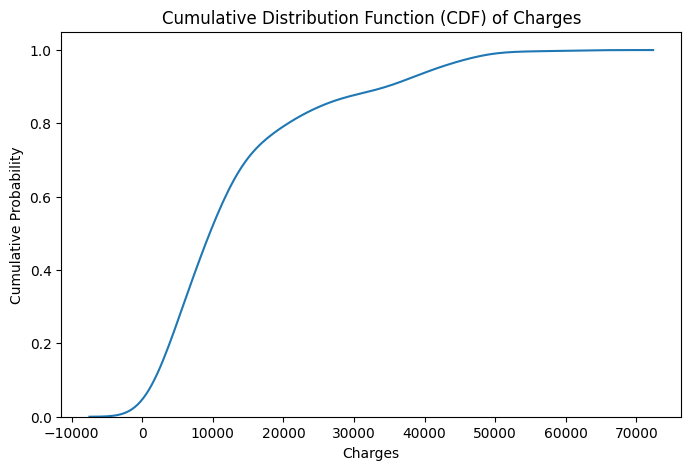

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(df['charges'], cumulative=True)
plt.title("Cumulative Distribution Function (CDF) of Charges")
plt.xlabel("Charges")
plt.ylabel("Cumulative Probability")
plt.show()



# **Dataset Size and Objective**

The dataset consists of 1338 rows and 7 columns, which is relatively small compared to modern big data applications.
Big data typically consists of millions or billions of records, whereas this dataset is manageable on a single machine.

However, for predictive modeling, 1338 records can still be sufficient to uncover meaningful insights about how medical
insurance costs are influenced by factors like age, BMI, smoking status, and region.

